## Import libraries & notebook configuration

In [1]:
import os
import pyxdf # xdf file importation
import matplotlib.pyplot as plt
import numpy as np
import nbformat #used to call other scripts
from my_functions import *

# library for creating filters
from scipy.signal import butter, iirnotch, filtfilt, welch
#%matplotlib widget

### Ensure that the root directory is the project directory
In some cases, the root directory may not be the project directory. This is usually the case when the notebook is run from a subdirectory of the project directory.

In [2]:
# if pwd is SRC  change to root
print("Current working directory: ", os.getcwd())
if os.path.basename(os.getcwd()) == "SRC":
    os.chdir("..")
print("Current working directory: ", os.getcwd())
print(os.path.basename(os.getcwd()))

Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio\SRC
Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Stage_Signal_Physio


In [3]:
plt.close("all")  # close all figure windows

## Initialization

### Xdf file selection and loading (REARM data)

In [4]:
# Define the xdf file of interest
xdf_input_filename="001_MolLud_20201112_1_c.xdf"
#xdf_filename="020_DesMar_20211129_1_c.xdf"

xdf_input_filepath=os.path.normpath("DAT/INPUT/"+xdf_input_filename)

### Convert xdf eeg data to csv

In [5]:
#option to process the signal before export to csv (detrending,rereferencing,filtering) (bool)
PROCESS_SIGNAL= True

#Execute the exportation of the EEG data in xdf file to csv, returns output filename
csv_input_filename = export_xdf_eeg_to_csv(xdf_input_filepath,PROCESS_SIGNAL) 


Input filepath:  DAT\INPUT\001_MolLud_20201112_1_c.xdf
Input filename:  001_MolLud_20201112_1_c
PROCESS_SIGNAL ? -- True
Processing signals
Detrending...
input_signals shape:
 (221938, 8)
input_signals mean per signal:
 [27897.195 26144.139 28026.402 35319.527 31324.672 24827.713 32372.799
 29788.95 ]
Rereferencing...
input_signals shape:(221938, 8)
input_signals whole mean:13.818697929382324
Filtering...
LOW_CUTOFF_FREQ_THEORETICAL=5,HIGH_CU-TOFF_FREQ_THEORETICAL=100
LOW_CUTOFF_FREQ_CORRECTED=4.732,HIGH_CUTOFF_FREQ_CORRECTED=104.203
NOTCH_CUTOFF_FREQ=50
Filtered signal shape: (221938, 8)
EEG_for_export shape : (221938, 8)
export data header : Channel_1:C4, Channel_2:FC2, Channel_3:FC6, Channel_4:CP2, Channel_5:C3, Channel_6:FC1, Channel_7:FC5, Channel_8:CP1,time(sec)
Input filepath : DAT\INPUT\001_MolLud_20201112_1_c.xdf
Output filepath : DAT\INPUT\001_MolLud_20201112_1_c_prepro_499.998_Hz.csv


### Load corresponding csv file

In [6]:
csv_input_filepath=os.path.normpath("DAT/INPUT/"+csv_input_filename)
print(csv_input_filepath)
EEG_data= np.genfromtxt(csv_input_filepath, delimiter=',',skip_header=1)

DAT\INPUT\001_MolLud_20201112_1_c_prepro_499.998_Hz.csv


### Tidy data

In [7]:
EEG_amplitudes=EEG_data[:,0:8] #first 8 columns are channels
EEG_times=EEG_data[:,8] #last is absolute time in sec
Srate=499
N=len(EEG_amplitudes)

## PSD estimation results : Electrode C3 and C4 

In [8]:
# definition of the EEG channels' names
channels_dict = {"Channel_1": "C4",
                "Channel_2": "FC2",
                "Channel_3": "FC6",
                "Channel_4": "CP2",
                "Channel_5": "C3",
                "Channel_6": "FC1",
                "Channel_7": "FC5",
                "Channel_8": "CP1"}

### Electrode selection

In [9]:
# Selection of electrodes to study
SELECT_CHANNEL_NUMBERS=np.array([1,5])

#list the name of the corresponding matlab results for selected electrodes
MATLAB_PSD_results_filenames_list=list_matlab_psd_results_filenames(input_signal_filename=csv_input_filename,channels_dict=channels_dict,
                                  selected_channel_numbers=SELECT_CHANNEL_NUMBERS)


"""channel_indexes=SELECT_CHANNEL_NUMBERS-1

#list of matlab PSD file to call for comparison with python results
MATLAB_PSD_results_filenames_list=[] 
print("selected channels :")
for (i,y) in zip(SELECT_CHANNEL_NUMBERS,channel_indexes):
    print(f"channel number:{i}, channel index:{y}")
    channel_name=f"Channel_{str(i)}_{channels_dict['Channel_'+str(i)]}"
    print(channel_name)

    #get name of corresponding matlab psd result 
    #filenamei="MATLAB_PSD_res_EEG_"+channel_name+"_"+csv_input_filename 
    filenamei=f"MATLAB_PSD_res_EEG_{channel_name}_{csv_input_filename }"

    MATLAB_PSD_results_filenames_list.append(filenamei)
print(f"matlab psd results file names: {MATLAB_PSD_results_filenames_list}")"""


#creer une fonction qui call les resultats matlab:
    #inputs: channel name, input filename,
    #outputs: data
    #ok
#appeler cette fonction dans plot_signal_time_dsps 
    #reutiliser l'argument external_results pour donner le titre du fichier csv matlab plutot qu'un boolean
    #remplacer  l'argument signal_name par figure_title
    #la fonction import psdresults2 ne devrait donc necessiter plus qu'un argument: le nom du fichier a importer

#creer une fonction qui liste les fichiers resultats CSV a appeler
    #inputs:signals_filename,Channels_dict,selected_channel numbers
    #outputs:psd_matlab_results_list


selected channels :
channel number:1, channel index:0
Channel_1_C4
channel number:5, channel index:4
Channel_5_C3
matlab psd results file names: ['MATLAB_PSD_res_EEG_Channel_1_C4_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv', 'MATLAB_PSD_res_EEG_Channel_5_C3_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv']


'channel_indexes=SELECT_CHANNEL_NUMBERS-1\n\n#list of matlab PSD file to call for comparison with python results\nMATLAB_PSD_results_filenames_list=[] \nprint("selected channels :")\nfor (i,y) in zip(SELECT_CHANNEL_NUMBERS,channel_indexes):\n    print(f"channel number:{i}, channel index:{y}")\n    channel_name=f"Channel_{str(i)}_{channels_dict[\'Channel_\'+str(i)]}"\n    print(channel_name)\n\n    #get name of corresponding matlab psd result \n    #filenamei="MATLAB_PSD_res_EEG_"+channel_name+"_"+csv_input_filename \n    filenamei=f"MATLAB_PSD_res_EEG_{channel_name}_{csv_input_filename }"\n\n    MATLAB_PSD_results_filenames_list.append(filenamei)\nprint(f"matlab psd results file names: {MATLAB_PSD_results_filenames_list}")'

### Import matlab psd results for selected electrodes

In [10]:
"""PSD_fft_electrodes=[]
PSD_p_electrodes=[]
PSD_w_electrodes=[]
#iterate simultaneously over the channel number and index, while keeping count of the number of iterations
for iter,(i,y) in enumerate(zip(SELECT_CHANNEL_NUMBERS,channel_indexes)):
    print(f"num:{i},index:{y}") 
    channel_name="Channel_"+str(i)+"_"+channels_dict["Channel_"+str(i)]
    print(channel_name)
    matlab_results_filename="MATLAB_PSD_res_EEG_"+channel_name+"_"+csv_input_filename 
    matlab_data = import_psd_results2(matlab_results_filename)
    figure_title=f"{csv_input_filename}\n {matlab_results_filename} \n {channel_name}"
    #storing python's PSD results
    PSD_fft_i, PSD_p_i, PSD_w_i=plot_signal_time_dsps(fig_number=iter,signal=EEG_amplitudes[:,y],sample_rate=Srate,
                    fig_title=figure_title,external_results=matlab_results_filename)
    PSD_fft_electrodes.append(PSD_fft_i)
    PSD_p_electrodes.append(PSD_p_i)
    PSD_w_electrodes.append(PSD_w_i)"""

'PSD_fft_electrodes=[]\nPSD_p_electrodes=[]\nPSD_w_electrodes=[]\n#iterate simultaneously over the channel number and index, while keeping count of the number of iterations\nfor iter,(i,y) in enumerate(zip(SELECT_CHANNEL_NUMBERS,channel_indexes)):\n    print(f"num:{i},index:{y}") \n    channel_name="Channel_"+str(i)+"_"+channels_dict["Channel_"+str(i)]\n    print(channel_name)\n    matlab_results_filename="MATLAB_PSD_res_EEG_"+channel_name+"_"+csv_input_filename \n    matlab_data = import_psd_results2(matlab_results_filename)\n    figure_title=f"{csv_input_filename}\n {matlab_results_filename} \n {channel_name}"\n    #storing python\'s PSD results\n    PSD_fft_i, PSD_p_i, PSD_w_i=plot_signal_time_dsps(fig_number=iter,signal=EEG_amplitudes[:,y],sample_rate=Srate,\n                    fig_title=figure_title,external_results=matlab_results_filename)\n    PSD_fft_electrodes.append(PSD_fft_i)\n    PSD_p_electrodes.append(PSD_p_i)\n    PSD_w_electrodes.append(PSD_w_i)'

selected channels :
channel number:1, channel index:0
Channel_1_C4
channel number:5, channel index:4
Channel_5_C3
matlab psd results file names: ['MATLAB_PSD_res_EEG_Channel_1_C4_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv', 'MATLAB_PSD_res_EEG_Channel_5_C3_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv']
channel name: Channel_1_C4
001_MolLud_20201112_1_c_prepro_499.998_Hz.csv
 MATLAB_PSD_res_EEG_Channel_1_C4_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv 
 Channel_1_C4
N:  221938
duration:  444.76553106212424
time_vector shape:  (221938,)
./DAT/OUTPUT/Matlab_PSD_Results/MATLAB_PSD_res_EEG_Channel_1_C4_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv <class 'str'>
channel name: Channel_5_C3
001_MolLud_20201112_1_c_prepro_499.998_Hz.csv
 MATLAB_PSD_res_EEG_Channel_5_C3_001_MolLud_20201112_1_c_prepro_499.998_Hz.csv 
 Channel_5_C3
N:  221938
duration:  444.76553106212424
time_vector shape:  (221938,)
./DAT/OUTPUT/Matlab_PSD_Results/MATLAB_PSD_res_EEG_Channel_5_C3_001_MolLud_20201112_1_c_prep

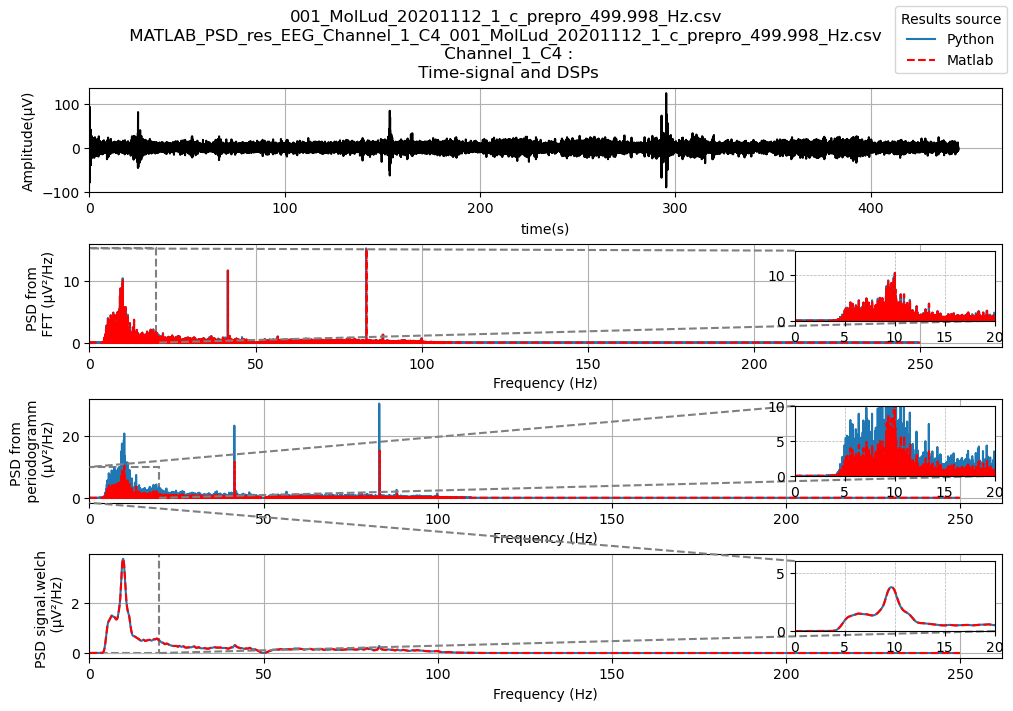

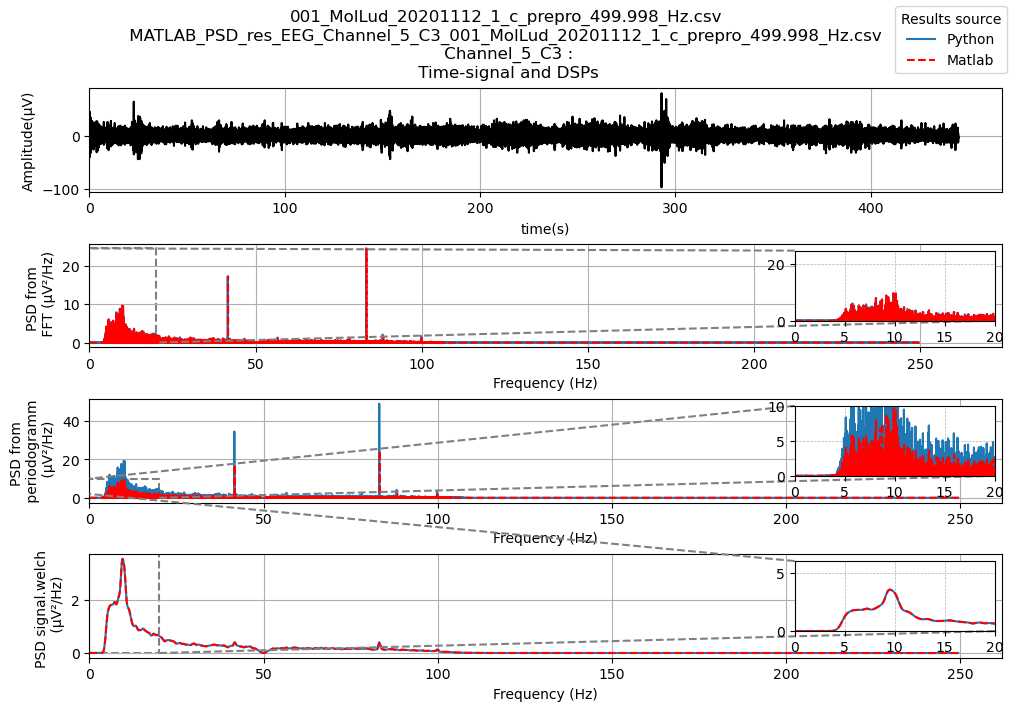

In [11]:
PSD_results=plot_multi_signal_time_dsps(multi_channel_signals=EEG_amplitudes, sample_rate=Srate,
                                channels_dict=channels_dict, selected_channel_numbers=SELECT_CHANNEL_NUMBERS,
                                input_signal_filename=csv_input_filename)

### Root mean square error (RMSE) of the difference between the python and matlab distributions for each PSD estimation method

In [12]:
rms_fft=rms(PSD_fft_python["psds"],PSD_fft_matlab["psds"],"rms_fft")
rms_p=rms(PSD_p_python["psds"],PSD_p_matlab["psds"],"rms_p")
rms_w=rms(PSD_w_python["psds"],PSD_w_matlab["psds"],"rms_w")


NameError: name 'PSD_fft_python' is not defined

In [ ]:
#PSD_fft_electrodes[0]["psds"]